In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [2]:
# Step 1: Load and preprocess the dataset
data = pd.read_csv("forestfires.csv")



In [3]:
# Drop unnecessary columns (month and day)
data = data.drop(['month', 'day'], axis=1)

In [4]:

# Convert size_category to binary labels (small and large)
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

In [5]:
# Step 2: Split the dataset into features and target
X = data.drop('area', axis=1)
y = data['area']


In [6]:
# Step 3: Encode categorical variables
label_encoder = LabelEncoder()
X['size_category'] = label_encoder.fit_transform(X['size_category'])


In [7]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Create a Sequential model
model = Sequential()

# Add an Input layer as the first layer in the model
model.add(Input(shape=(31,)))

# Add more layers to your model as needed
# For example:
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Add more layers as needed
# Step 5: Build and train a neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])


In [14]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [15]:
# Step 6: Evaluate the model's performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error: 11788.48310473279


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("forestfires.csv")


In [18]:
print(data.head())


  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

In [19]:
print(data.describe())


             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818   

In [20]:
print(data.isnull().sum())


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


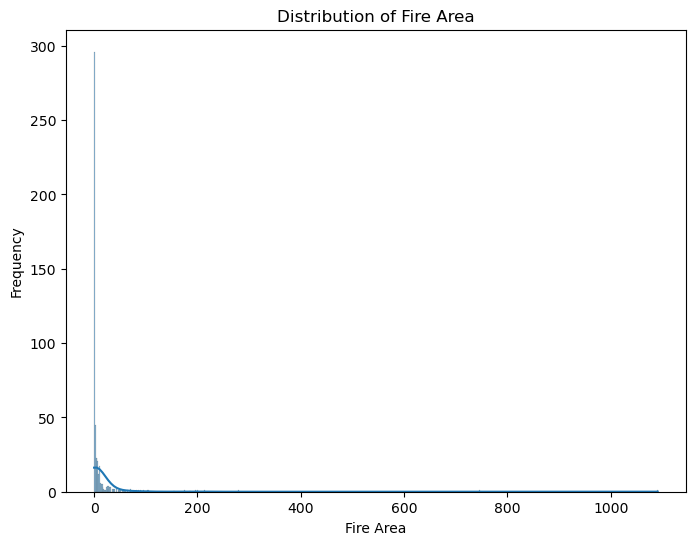

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='area', kde=True)
plt.title('Distribution of Fire Area')
plt.xlabel('Fire Area')
plt.ylabel('Frequency')
plt.show()

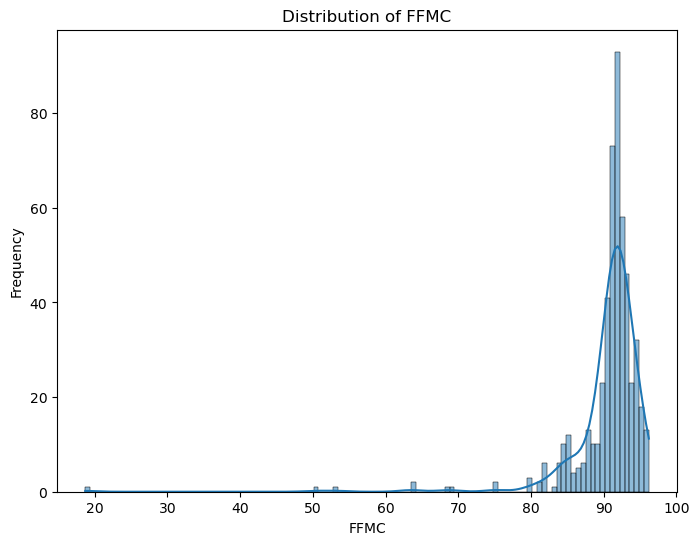

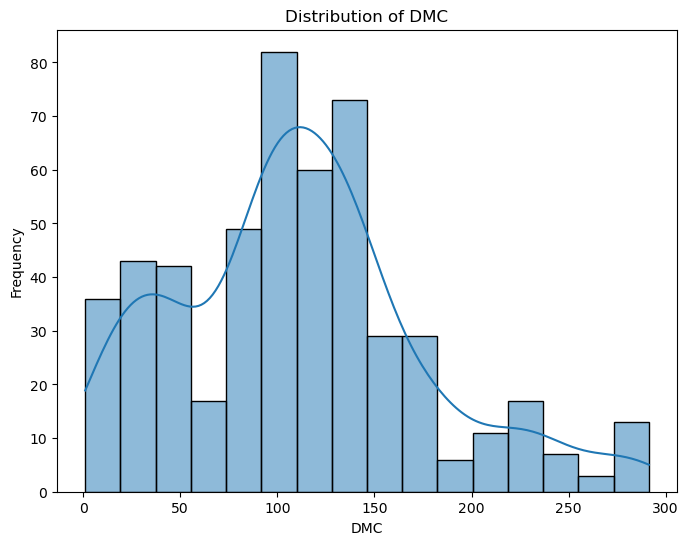

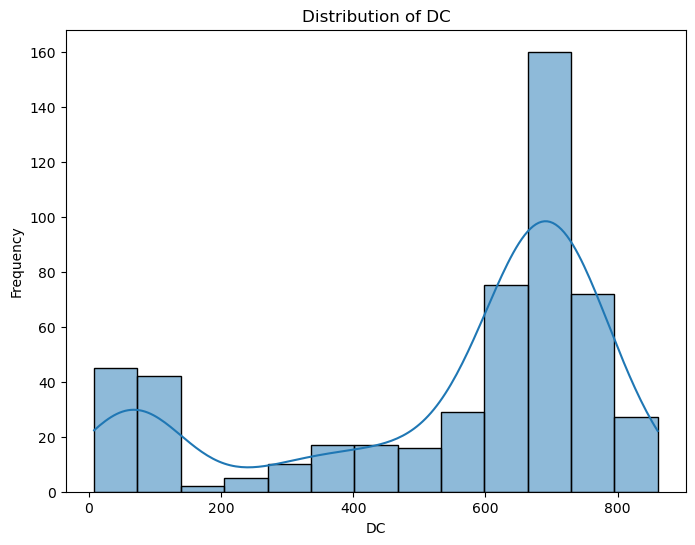

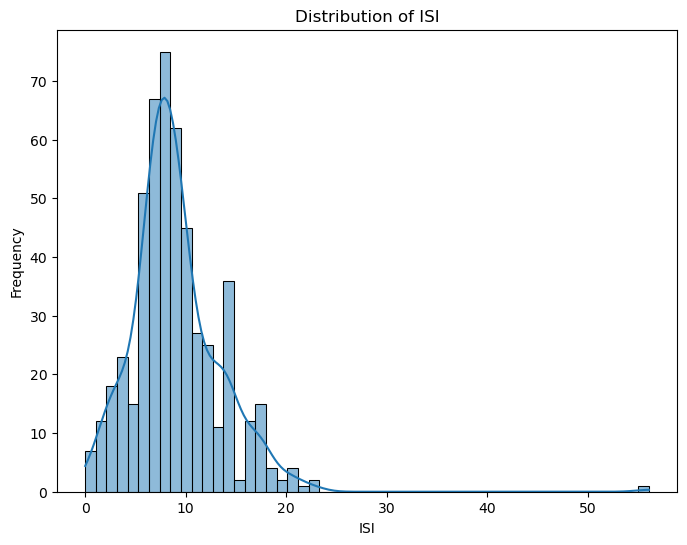

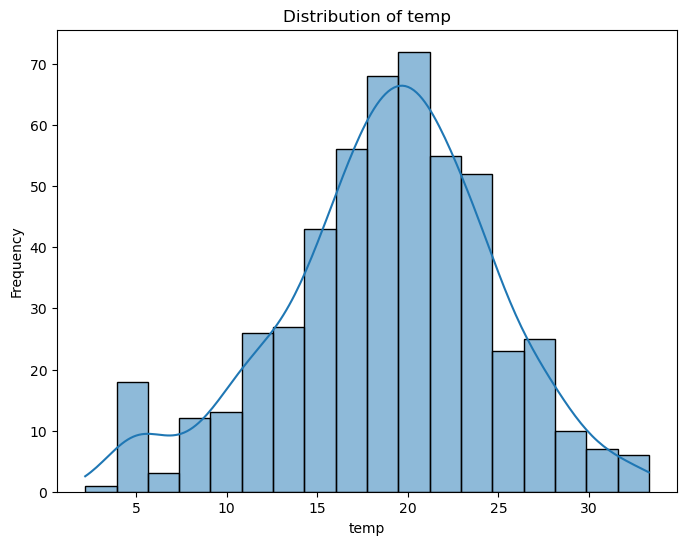

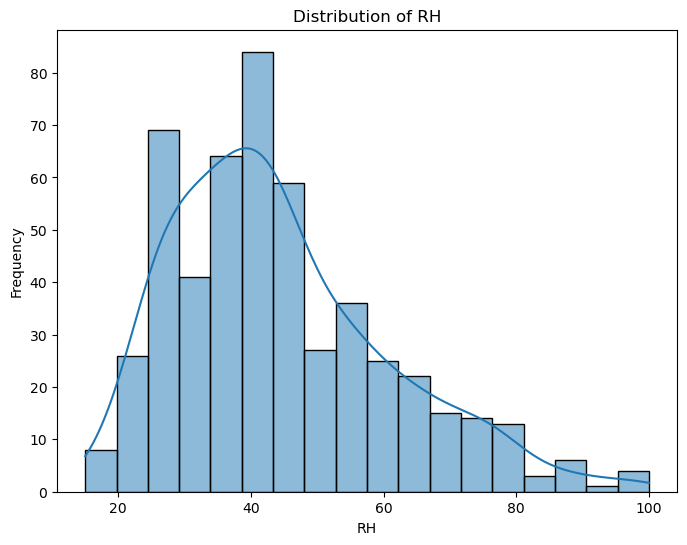

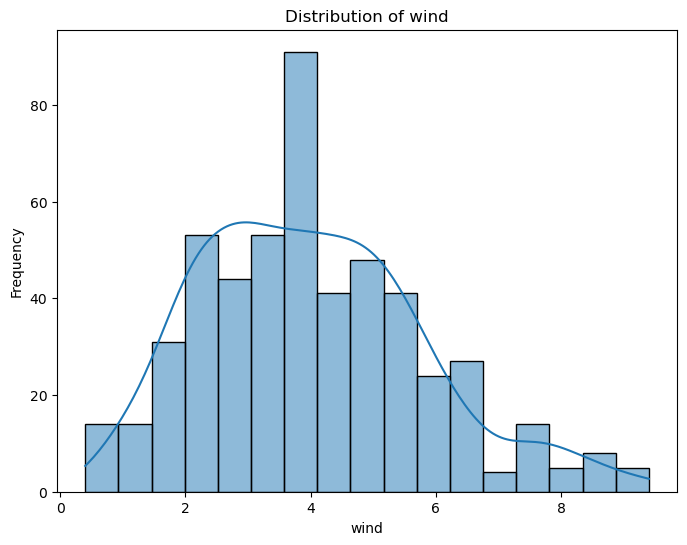

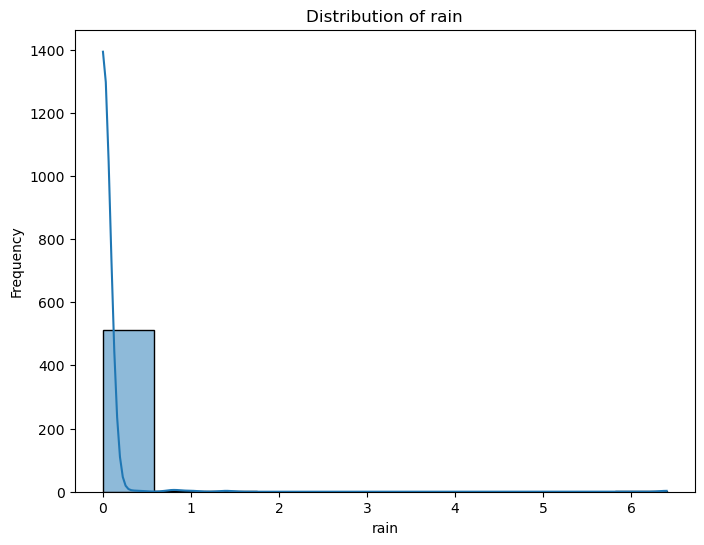

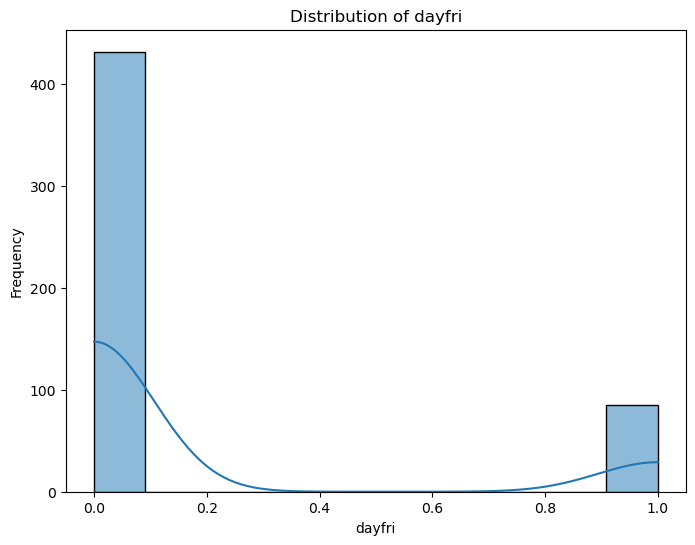

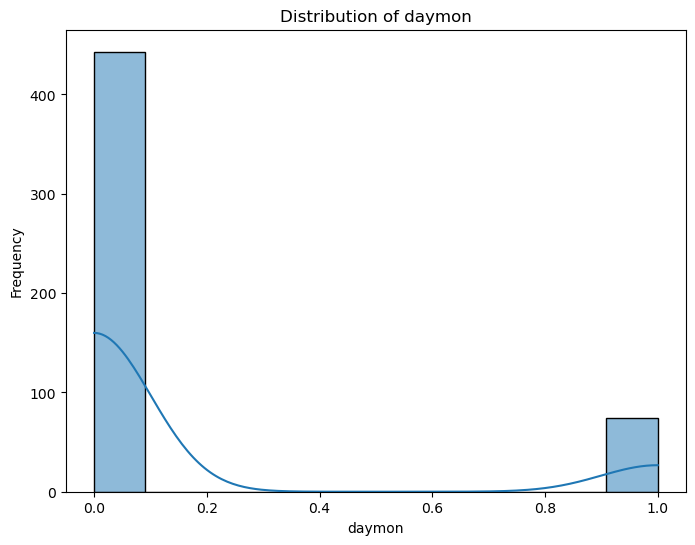

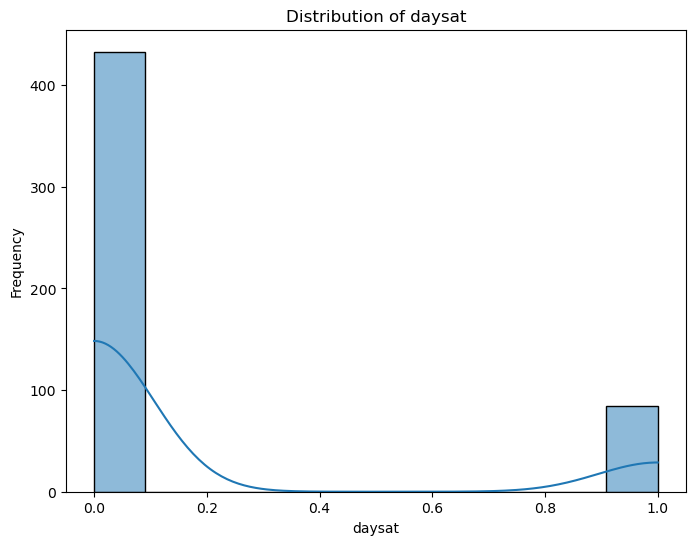

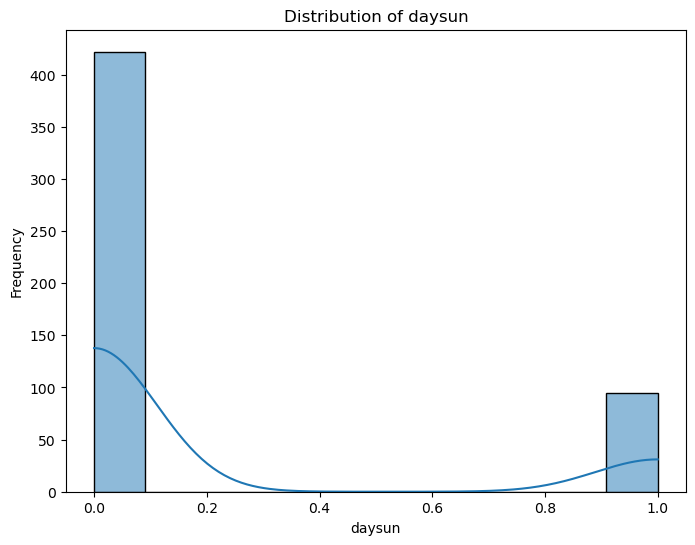

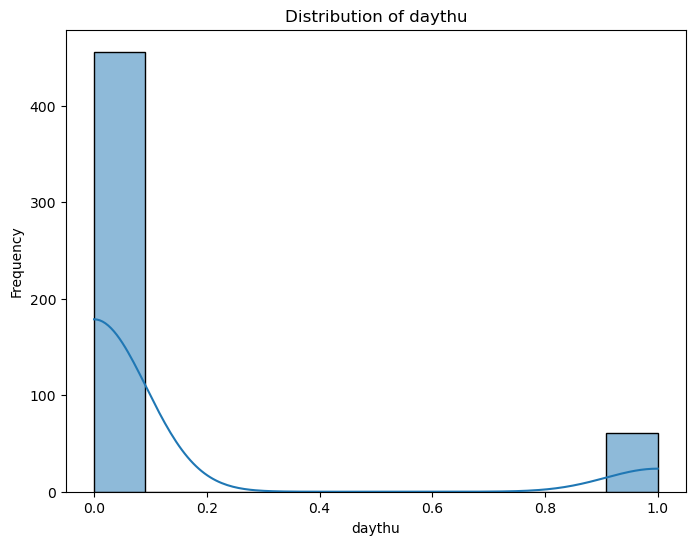

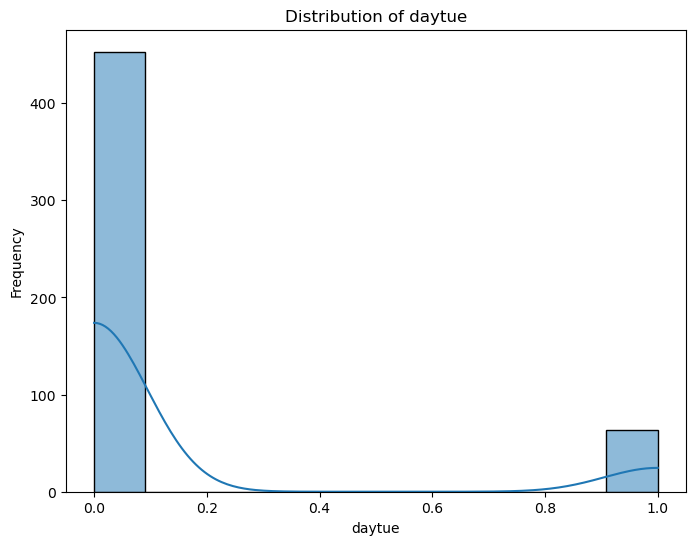

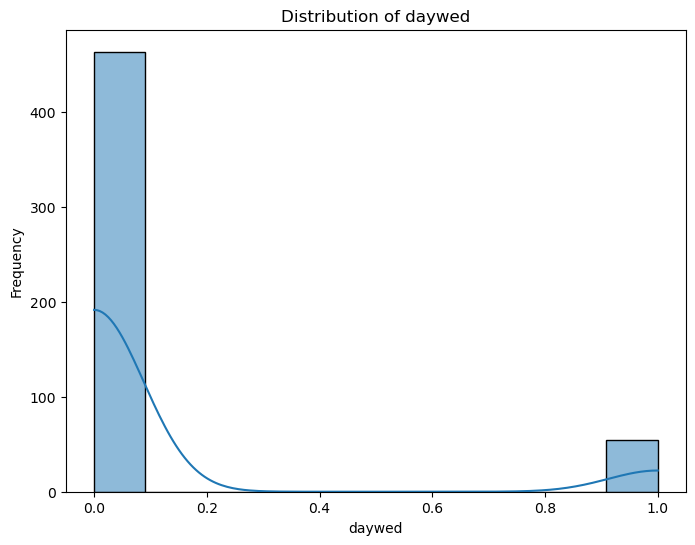

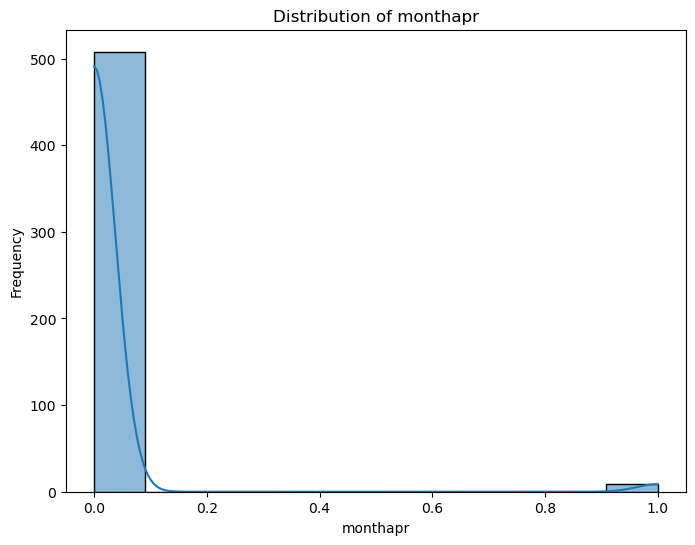

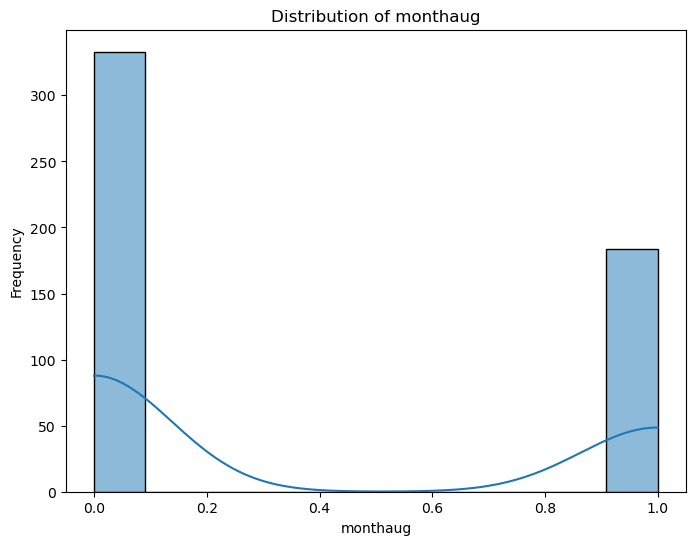

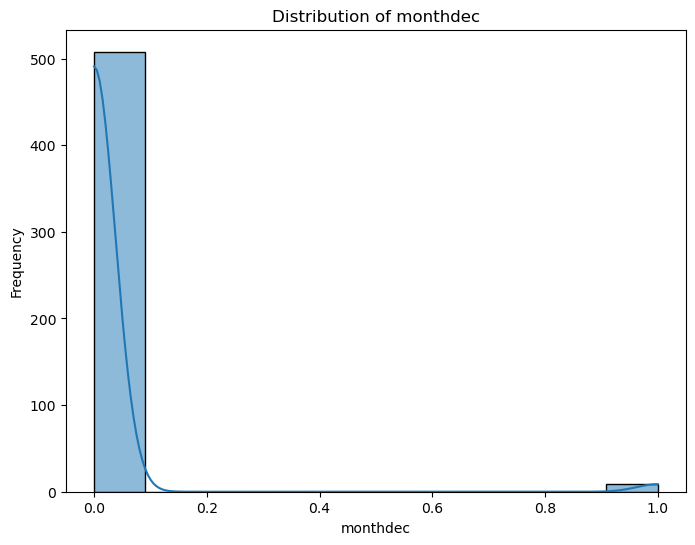

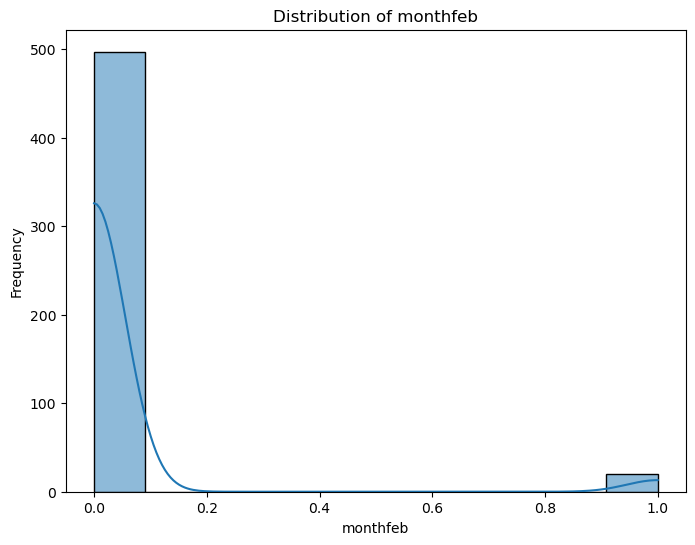

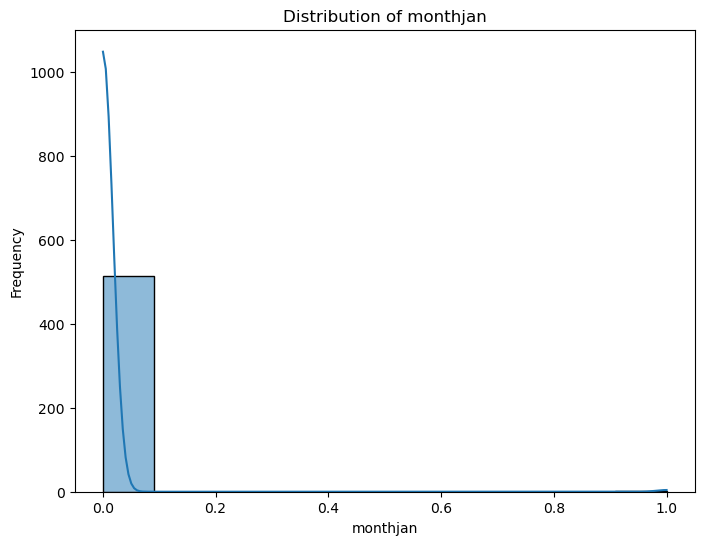

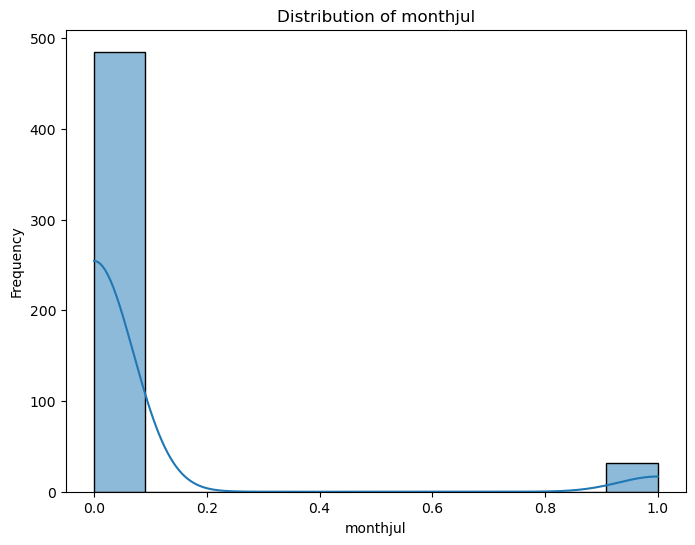

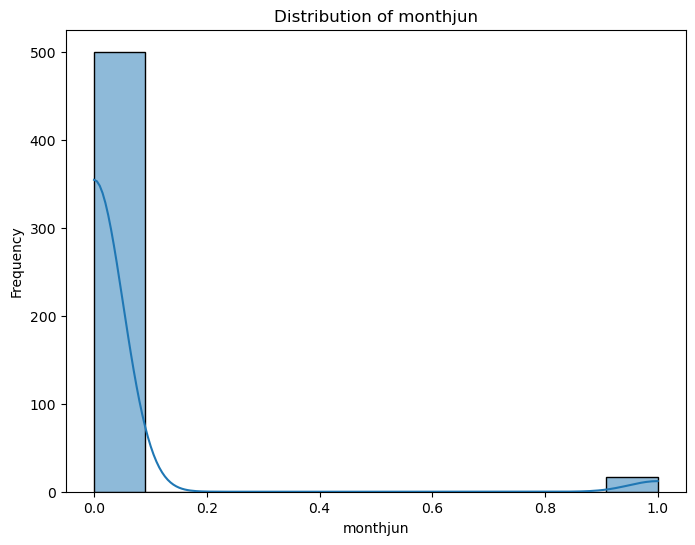

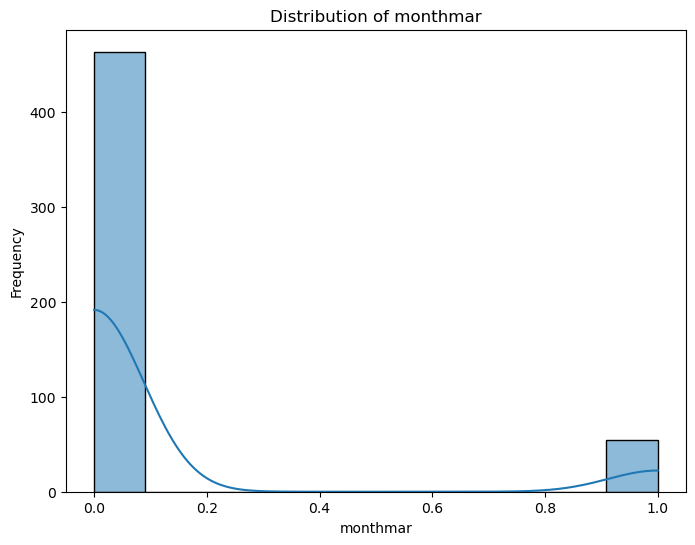

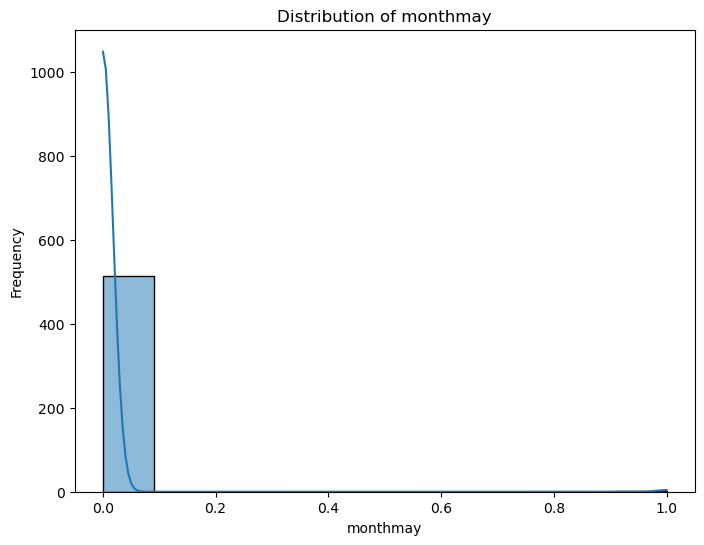

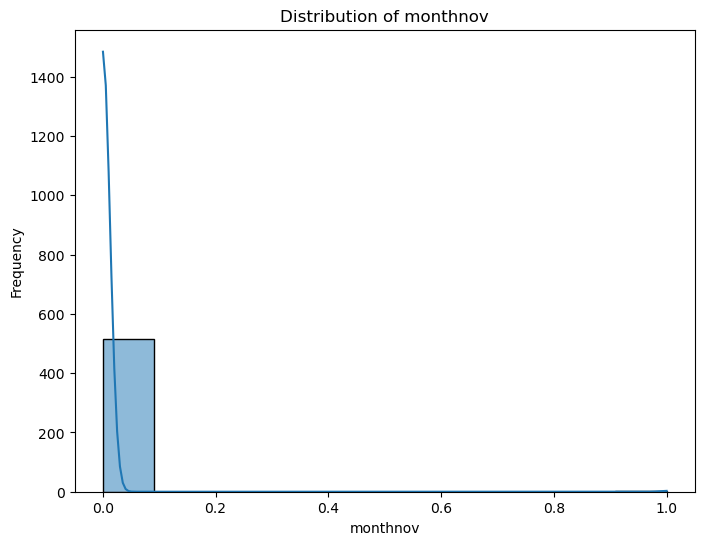

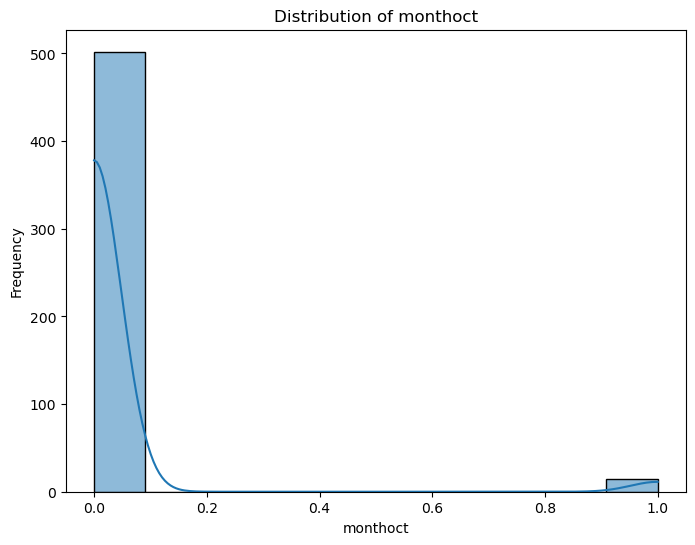

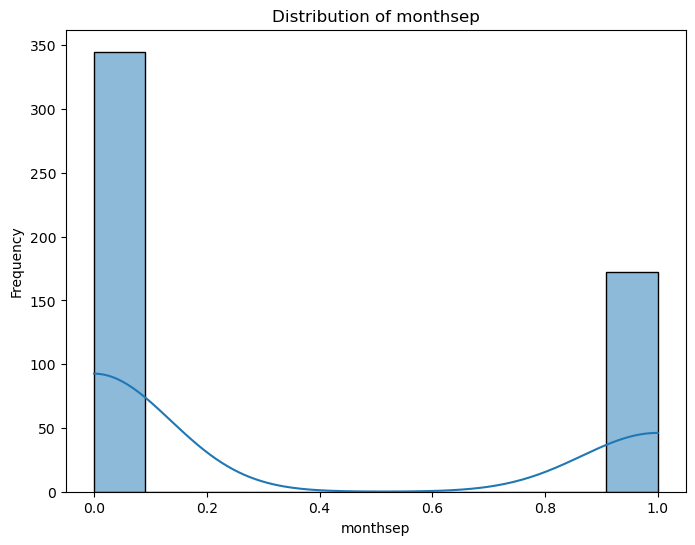

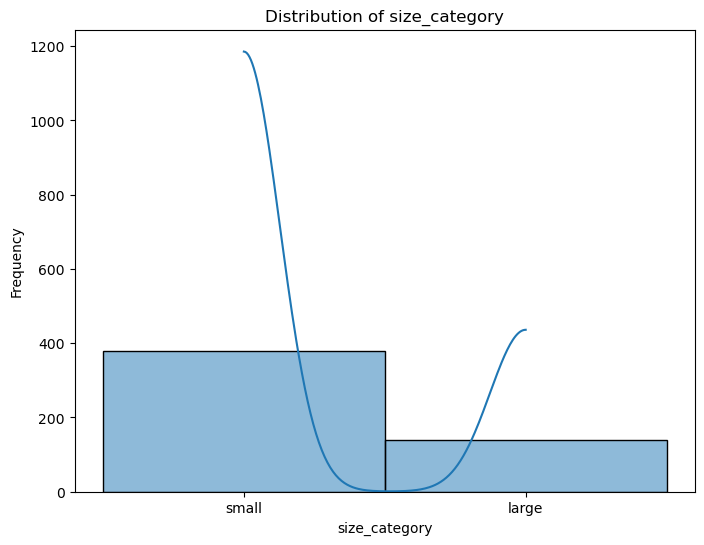

In [22]:
for feature in data.columns:
    if feature not in ['month', 'day', 'area']:  # Skip month, day, and target variable
        plt.figure(figsize=(8, 6))
        sns.histplot(data=data, x=feature, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

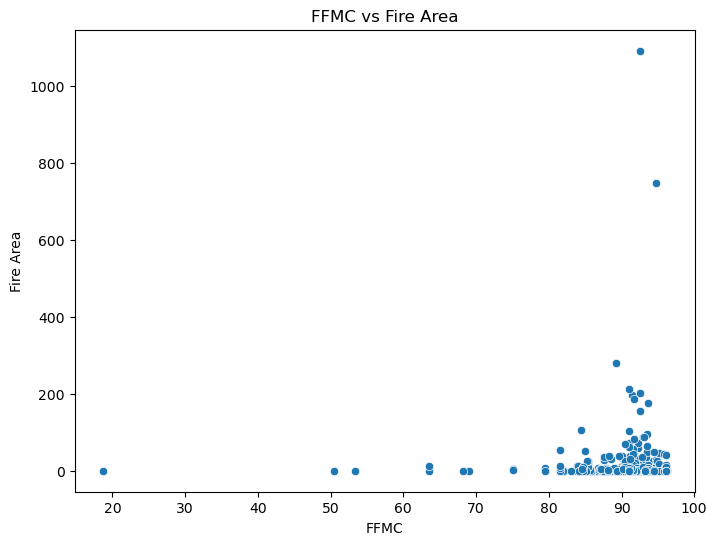

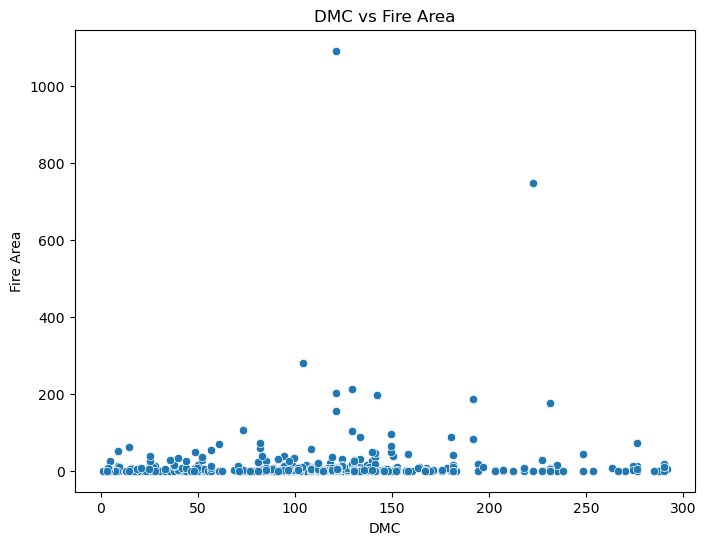

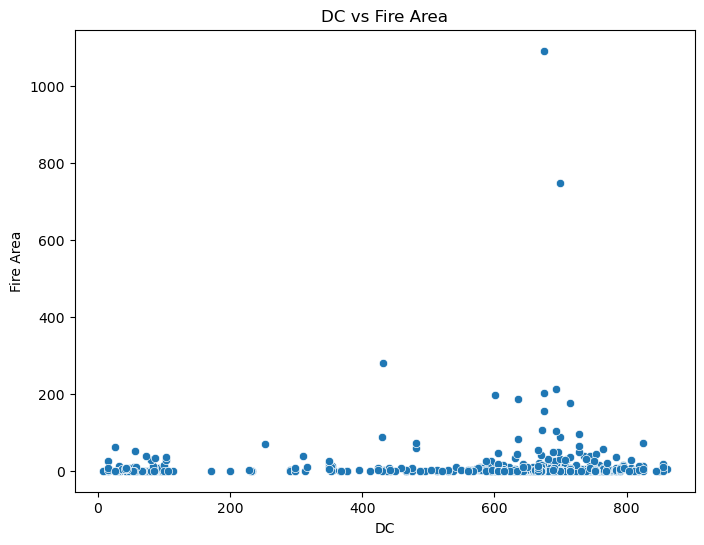

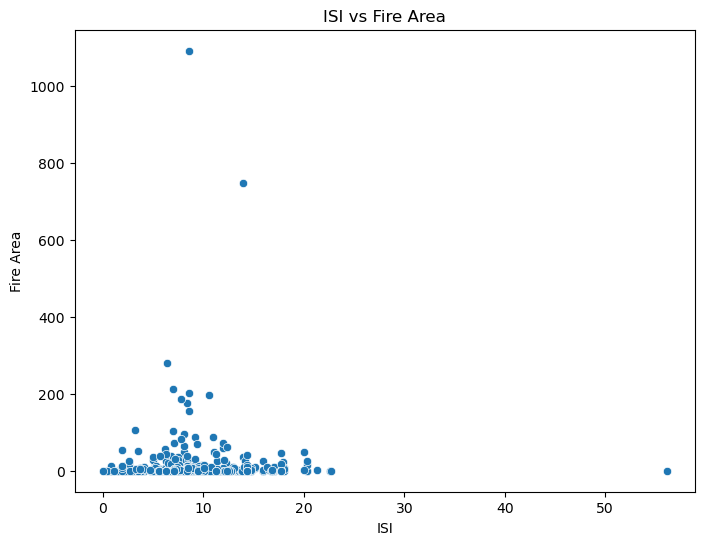

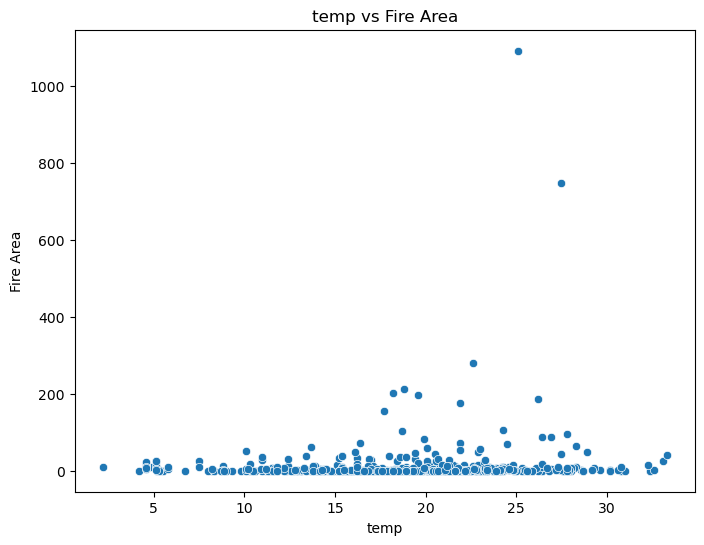

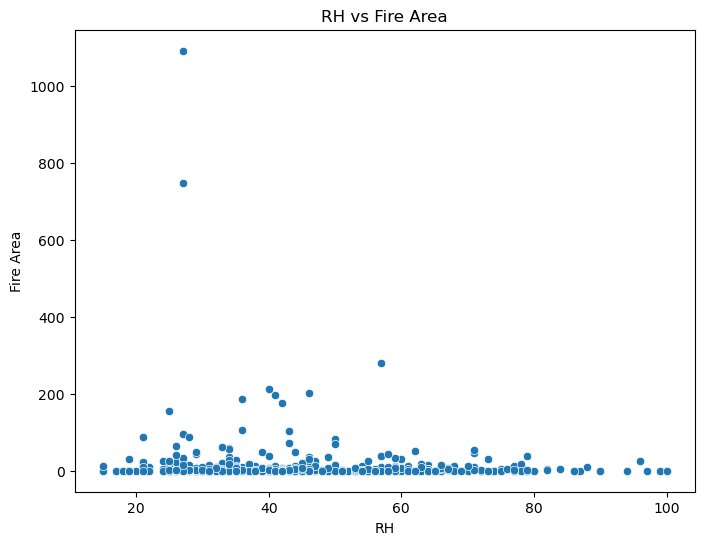

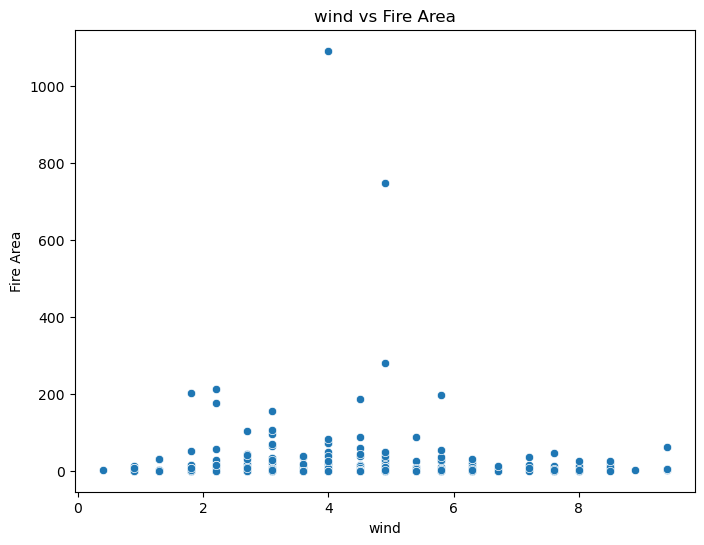

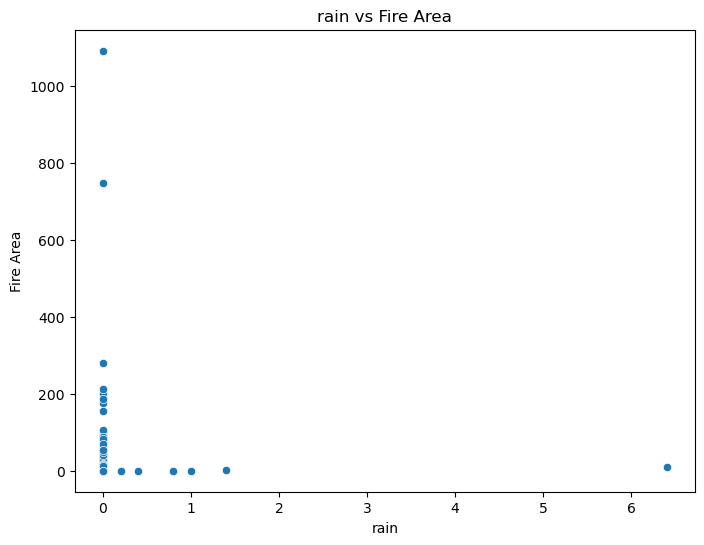

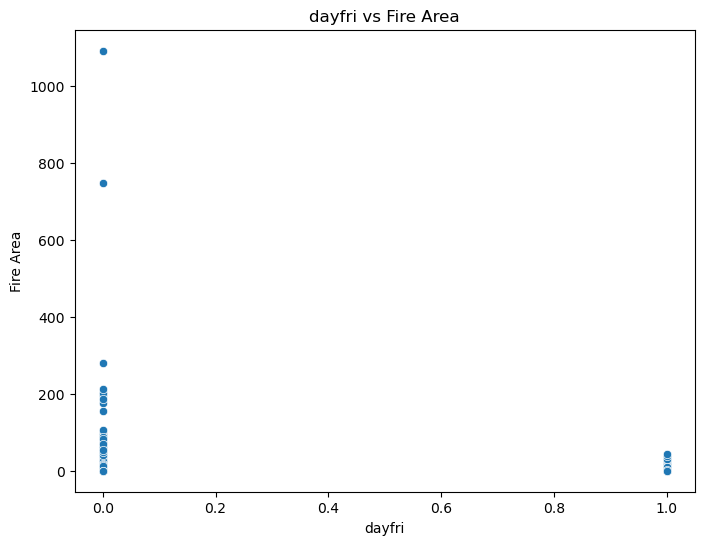

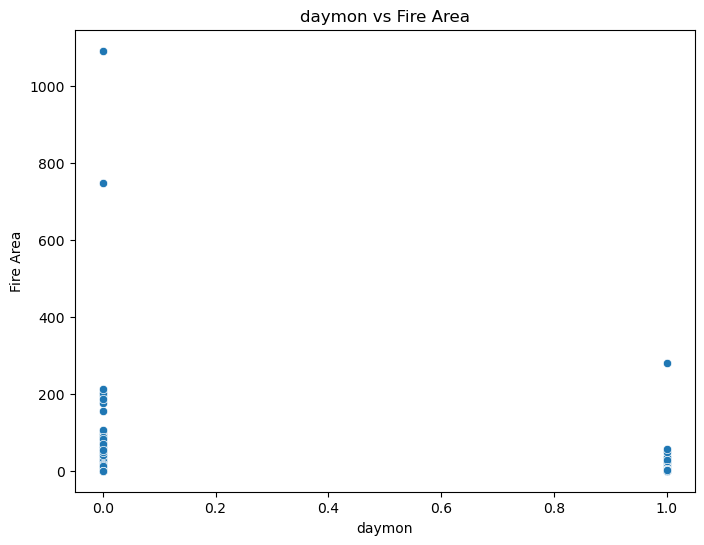

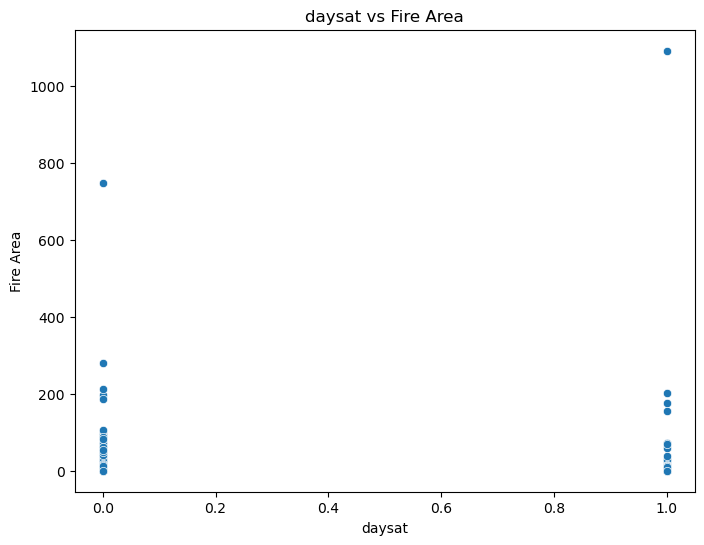

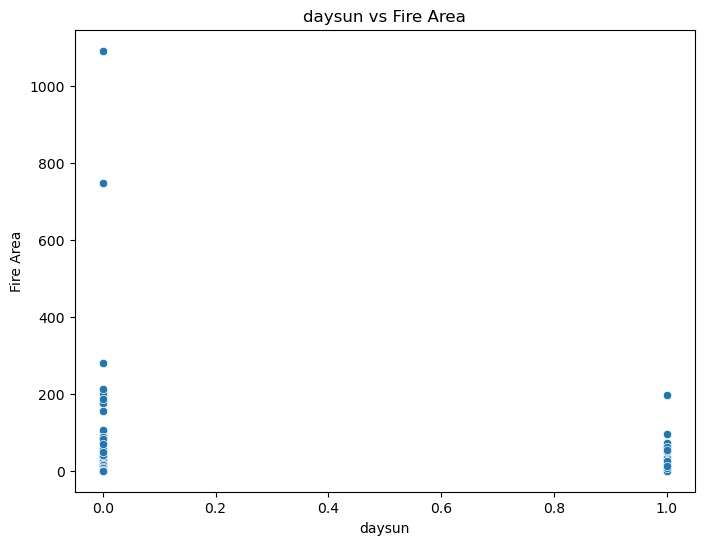

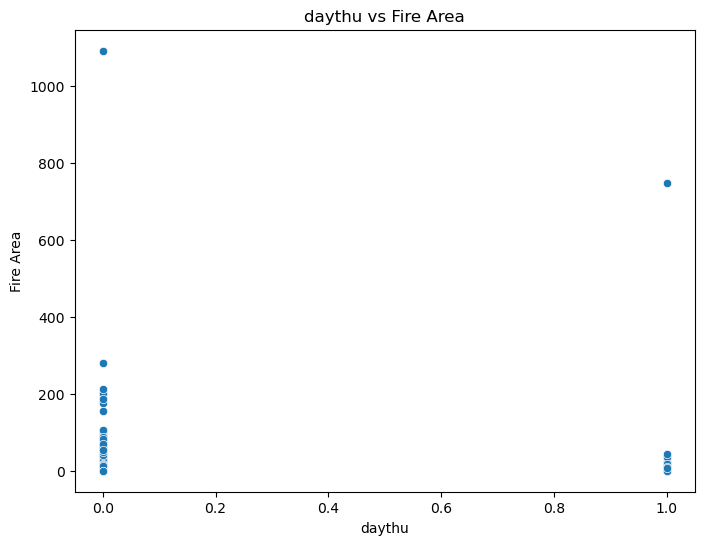

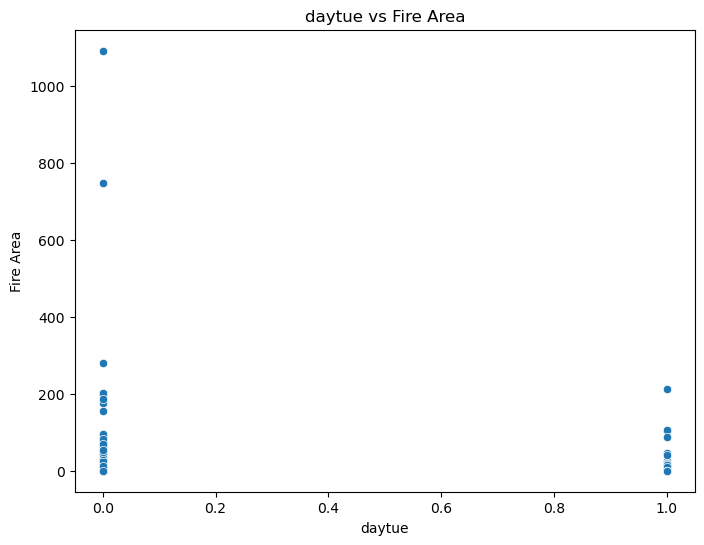

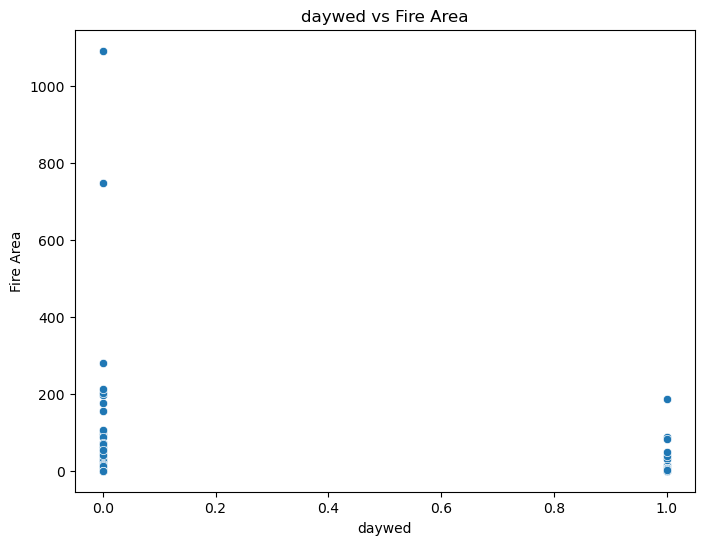

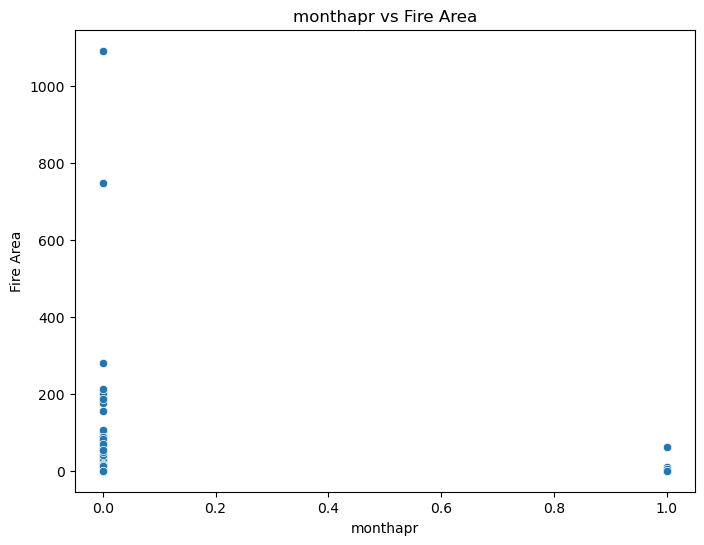

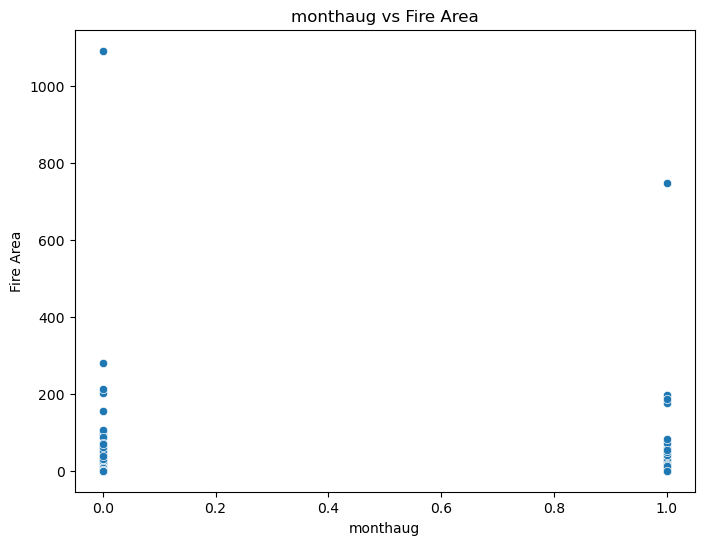

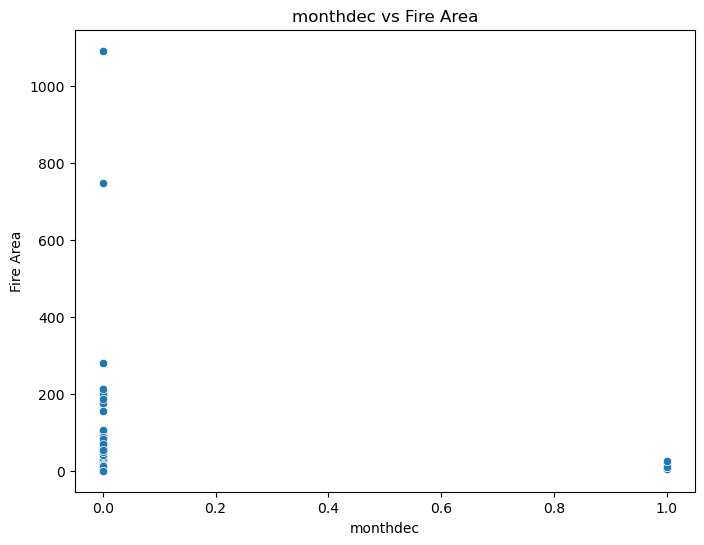

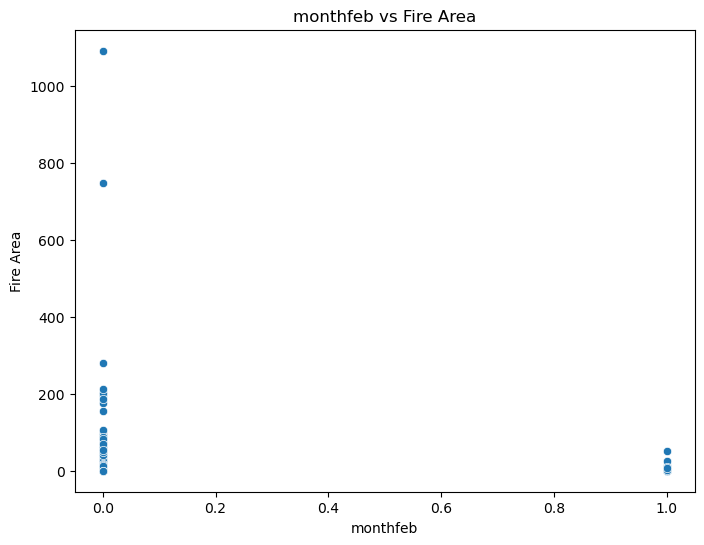

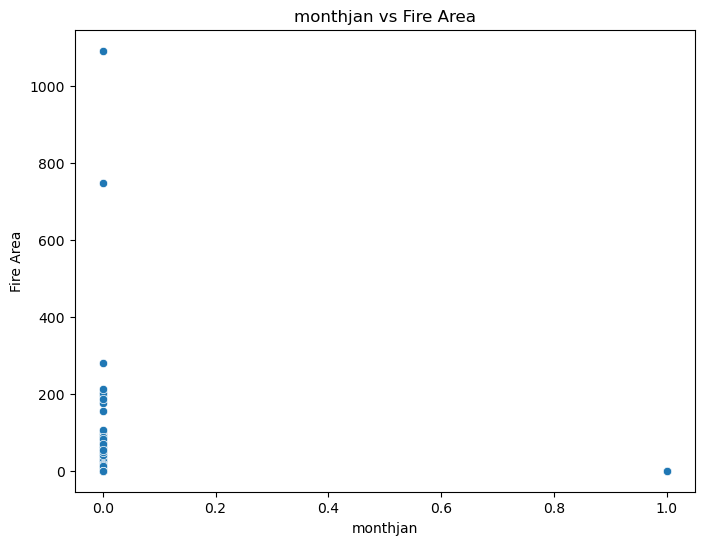

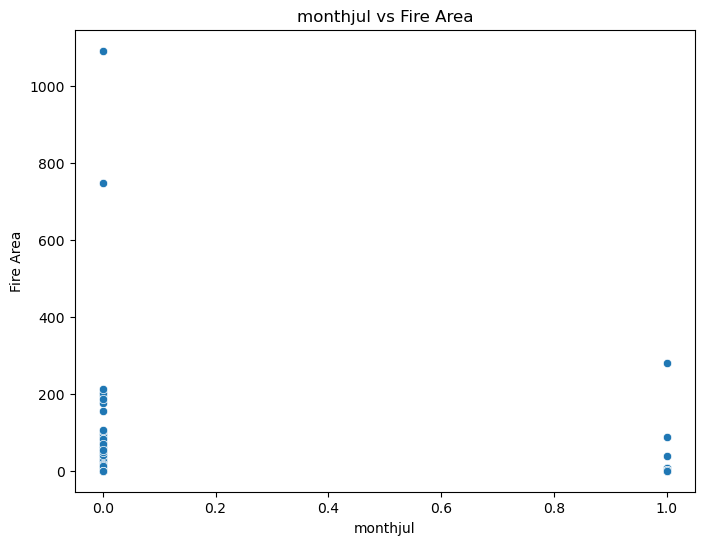

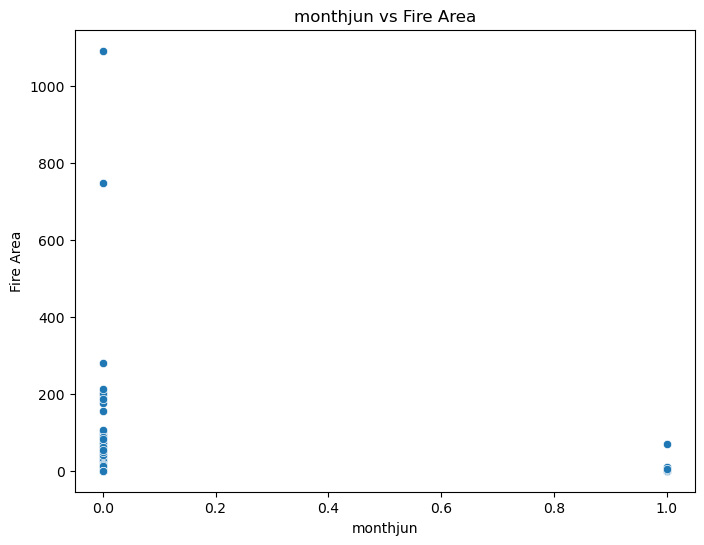

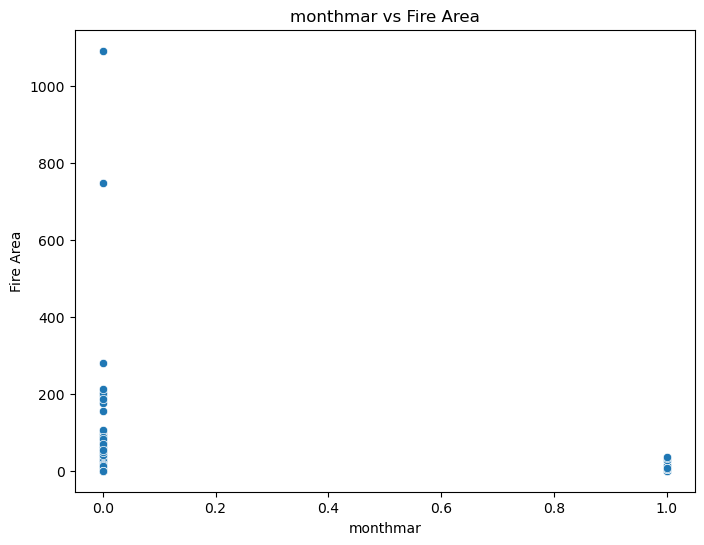

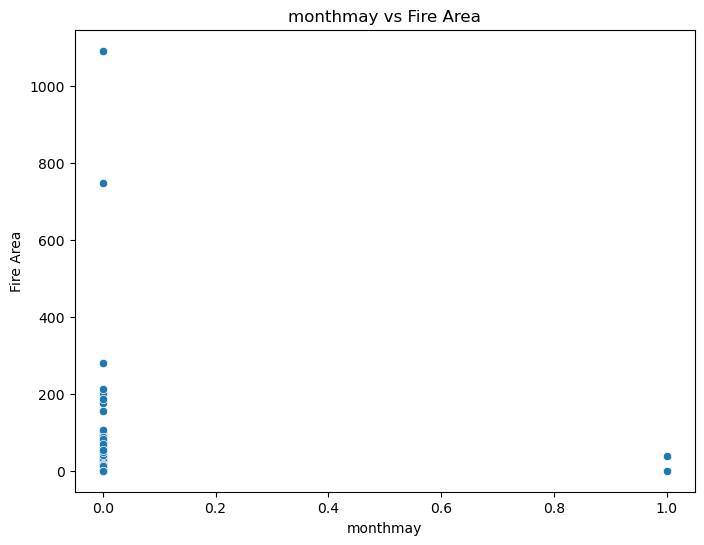

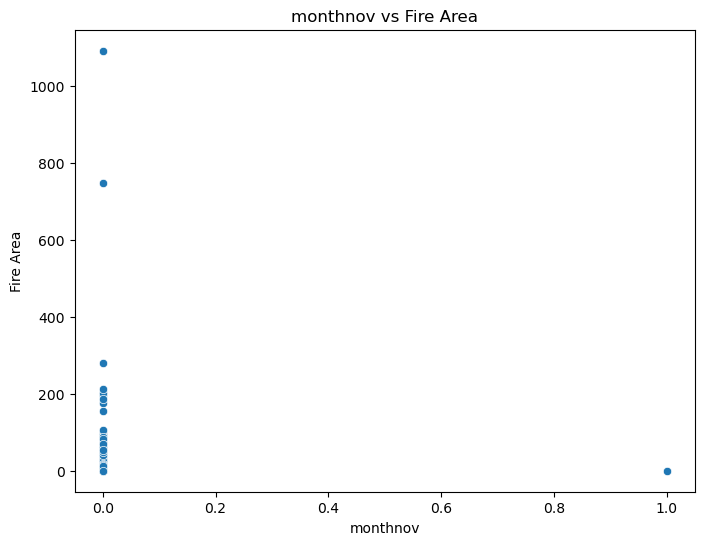

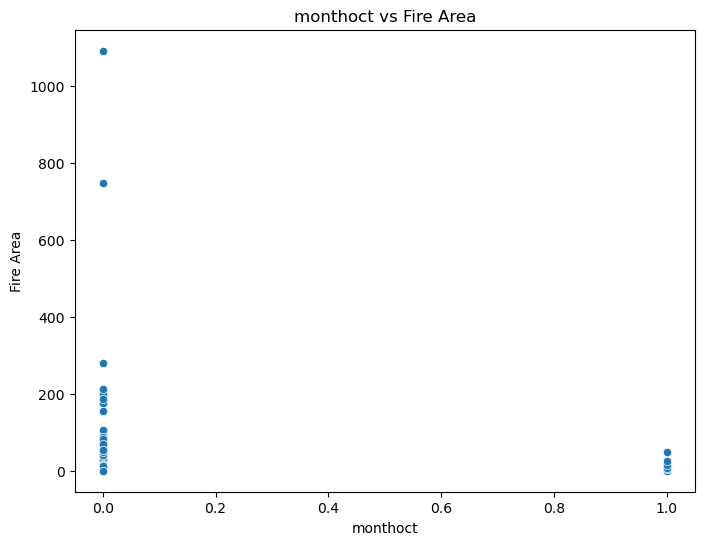

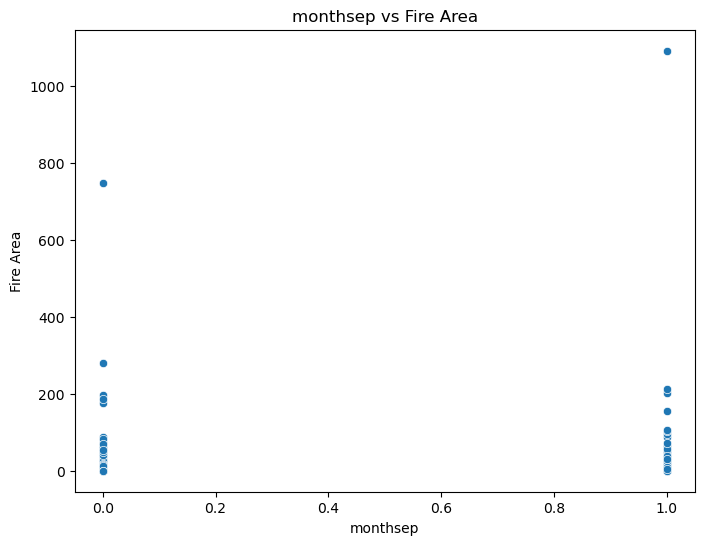

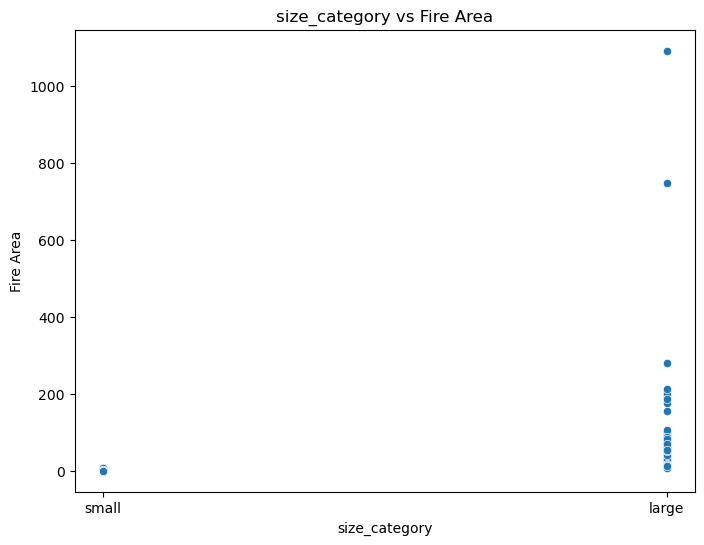

In [23]:
for feature in data.columns:
    if feature not in ['month', 'day', 'area']:  # Skip month, day, and target variable
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x=feature, y='area')
        plt.title(f'{feature} vs Fire Area')
        plt.xlabel(feature)
        plt.ylabel('Fire Area')
        plt.show()

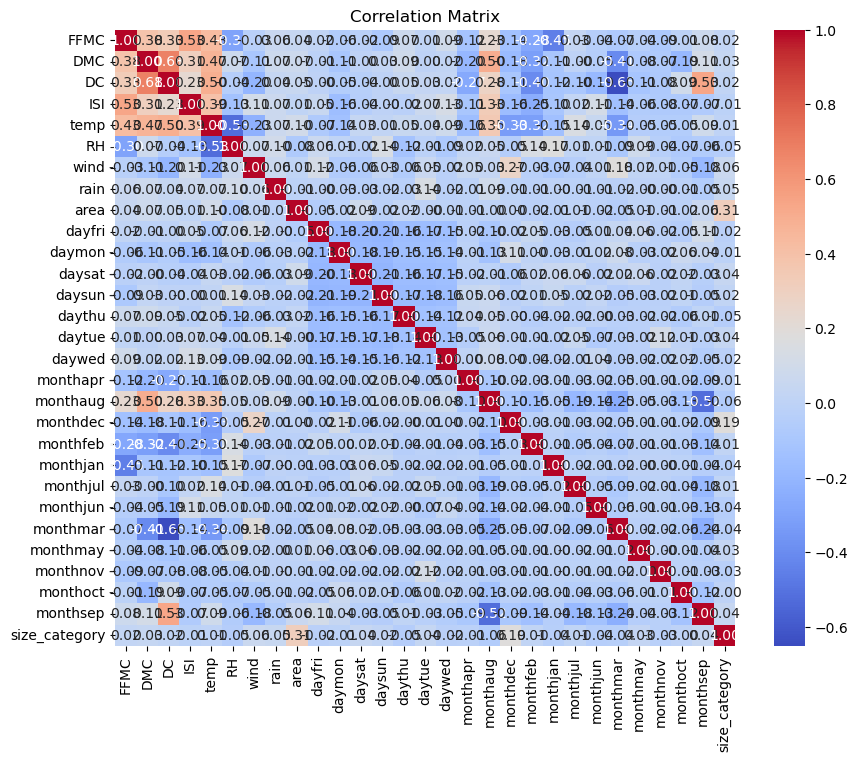

In [26]:
# Convert size_category to binary labels (small and large)
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
